In [11]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn import decomposition
from matplotlib.backends.backend_pdf import PdfPages
import importlib
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering

sys.path.append('..')
import catrace
from catrace import dataio
import catrace.process_time_trace as ptt
import catrace.plot_trace as pltr
import catrace.pattern_correlation as pcr
import catrace.exp_collection as ecl
import catrace.cluster as catclust
from catrace.frame_time import convert_sec_to_frame
from catrace.trace_dataframe import concatenate_planes
importlib.reload(catrace.plot_trace)
importlib.reload(ecl)
importlib.reload(pltr)
import catrace.frame_time as frame_time
import dataset_param as dtpar

In [4]:
exp_list = [( '2021-02-05-DpOBEM-JH9','phe-arg'),
            ('2021-03-18-DpOBEM-JH10','phe-arg'),
            ('2021-03-19-DpOBEM-JH10','phe-arg'),
            ('2021-04-02-DpOBEM-JH11','phe-arg'),
            ('2021-04-03-DpOBEM-JH11','phe-arg'),
            ('2021-05-01-DpOBEM-JH13','phe-arg'),
            ('2021-05-22-DpOBEM-JH14','phe-arg'),
            ('2021-07-15-DpOBEM-N2'  ,'naive'),
            ('2021-07-16-DpOBEM-N3' ,'naive'),
            ('2021-07-30-DpOBEM-JH17','arg-phe'),
            ('2021-07-31-DpOBEM-JH17','arg-phe'),
            ('2021-09-02-DpOBEM-JH18','arg-phe'),
            ('2021-09-03-DpOBEM-JH18','arg-phe'),
            ('2021-09-04-DpOBEM-JH18','arg-phe'),
            ('2021-09-15-DpOBEM-JH20','phe-arg'),
            ('2021-09-17-DpOBEM-JH20','phe-arg'),
            ('2021-09-18-DpOBEM-JH20','phe-arg'),
            ('2021-09-29-DpOBEM-JH21','arg-phe'),
            ('2021-10-01-DpOBEM-JH21','arg-phe'),
            ('2021-10-02-DpOBEM-JH21','arg-phe'),
            ('2021-11-10-DpOBEM-JH23','phe-trp'),
            ('2021-11-14-DpOBEM-JH23','phe-trp'),
            ('2021-11-24-DpOBEM-JH24','phe-trp'),
            ('2021-11-27-DpOBEM-JH24','phe-trp'),
            ('2021-11-26-DpOBEM-JH24','phe-trp'),
            ('2021-12-10-DpOBEM-N4','naive'),
            ('2021-12-31-DpOBEM-N7','naive'),
            ('2022-01-23-DpOBEM-N8','naive'),
            ('2022-01-30-DpOBEM-N9','naive'),
            ('2022-02-13-DpOBEM-N10','naive'),
            ('2022-02-20-DpOBEM-N11','naive')]


region_list = ['Dp', 'OB']
frame_rate = 30/4
#num_trial = 3
exp_info = dict(num_trial=3)
# TODO odor list bile acid order might be wrong!!
odor_list = ['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont']
#plane_nb_list = np.array([1,2,3,4]) - 1
data_root_dir = '/media/hubo/WD_BoHu/Ca_imaging/results/'
dfovf_dict = dict()
load_data = False
if load_data:
    for region in region_list:
        dfovf_dict[region] = dict()
        for exp in exp_list:
            exp_name = exp[0]
            print(exp_name, region)
            dfovf_dict[region][exp_name] = ecl.load_dfovf(data_root_dir, exp_name, region)

In [5]:
importlib.reload(ecl)
select_neuron_explist = ecl.get_data_dict_decorator(exp_list, region_list, dfovf_dict, ptt.select_neuron)
thresh = 5.5
dfovf_select_dict = select_neuron_explist(thresh)

2021-02-05-DpOBEM-JH9 Dp
2021-03-18-DpOBEM-JH10 Dp
2021-03-19-DpOBEM-JH10 Dp
2021-04-02-DpOBEM-JH11 Dp
2021-04-03-DpOBEM-JH11 Dp
2021-05-01-DpOBEM-JH13 Dp
2021-05-22-DpOBEM-JH14 Dp
2021-07-15-DpOBEM-N2 Dp
2021-07-16-DpOBEM-N3 Dp
2021-07-30-DpOBEM-JH17 Dp
2021-07-31-DpOBEM-JH17 Dp
2021-09-02-DpOBEM-JH18 Dp
2021-09-03-DpOBEM-JH18 Dp
2021-09-04-DpOBEM-JH18 Dp
2021-09-15-DpOBEM-JH20 Dp
2021-09-17-DpOBEM-JH20 Dp
2021-09-18-DpOBEM-JH20 Dp
2021-09-29-DpOBEM-JH21 Dp
2021-10-01-DpOBEM-JH21 Dp
2021-10-02-DpOBEM-JH21 Dp
2021-11-10-DpOBEM-JH23 Dp
2021-11-14-DpOBEM-JH23 Dp
2021-11-24-DpOBEM-JH24 Dp
2021-11-27-DpOBEM-JH24 Dp
2021-11-26-DpOBEM-JH24 Dp
2021-12-10-DpOBEM-N4 Dp
2021-12-31-DpOBEM-N7 Dp
2022-01-23-DpOBEM-N8 Dp
2022-01-30-DpOBEM-N9 Dp
2022-02-13-DpOBEM-N10 Dp
2022-02-20-DpOBEM-N11 Dp
2021-02-05-DpOBEM-JH9 OB
2021-03-18-DpOBEM-JH10 OB
2021-03-19-DpOBEM-JH10 OB
2021-04-02-DpOBEM-JH11 OB
2021-04-03-DpOBEM-JH11 OB
2021-05-01-DpOBEM-JH13 OB
2021-05-22-DpOBEM-JH14 OB
2021-07-15-DpOBEM-N2 OB
2021

In [7]:
region = 'OB'
plist = dfovf_select_dict[region].values() #[p for p in dfovf_select_dict[region].values()]
all_dfovf_select = pd.concat(plist, keys=dfovf_select_dict[region].keys(), names=['fish_id'])
list(all_dfovf_select.columns)

all_dfovf_select.to_pickle('../../results/JH_analysis/all_dfovf_select_{}.pkl'.format(region))
all_dfovf_select

time                                                 0         1         2    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     4       0.124669  0.307171 -0.256680   
                                        7       0.435329  0.772177 -0.291736   
                                        10     -0.070399  0.347863  0.292756   
                                        11      0.007183  0.434809  0.088401   
                                        15      0.156401  0.098130 -0.118343   
...                                                  ...       ...       ...   
2022-02-20-DpOBEM-N11 spont 2     3     233    -0.345779  0.213406 -0.262095   
                                        234    -0.074087 -0.042906 -0.092644   
                                        235    -0.012523  0.121835  0.106448   
                                        236    -0.169257 -0.144329 -0.136189   
                                        237     0.075036  0.357847  0.036432   

time                                                 3         4         5    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     4      -0.060342  0.215111  0.435966   
                                        7      -0.041180  0.106638 -0.149039   
                                        10      0.073496  0.088917  0.243576   
                                        11      0.006559  0.318632 -0.170444   
                                        15     -0.028309  0.166817  0.173485   
...                                                  ...       ...       ...   
2022-02-20-DpOBEM-N11 spont 2     3     233    -0.057306  0.002084 -0.116704   
                                        234     0.042016 -0.082668  0.022839   
                                        235     0.260385  0.127899  0.173002   
                                        236     0.007174  0.053693  0.376817   
                                        237    -0.170133 -0.328750 -0.231277   

time                                                 6         7         8    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     4       0.563528 -0.084697  0.351917   
                                        7      -0.073894  0.214012  0.011671   
                                        10      0.092401  0.029222 -0.043704   
                                        11     -0.176170 -0.121720 -0.095405   
                                        15     -0.118437  0.185636 -0.035801   
...                                                  ...       ...       ...   
2022-02-20-DpOBEM-N11 spont 2     3     233    -0.127380  0.403885 -0.214090   
                                        234    -0.035700  0.069126 -0.035863   
                                        235    -0.147376 -0.040974 -0.170283   
                                        236     0.253063  0.239505  0.202531   
                                        237    -0.316067 -0.006209  0.496629   

time                                                 9    ...       155  \
fish_id               odor  trial plane neuron            ...             
2021-02-05-DpOBEM-JH9 phe   0     0     4       0.054354  ... -0.264509   
                                        7      -0.077880  ... -0.004181   
                                        10      0.255228  ...  0.012867   
                                        11      0.023418  ...  0.082068   
                                        15      0.056167  ...  0.102302   
...                                                  ...  ...       ...   
2022-02-20-DpOBEM-N11 spont 2     3     233     0.185862  ...  0.056573   
                                        234    -0.015348  ... -0.233260   
                                        235     0.122697  ...  0.040781   
                                        236    -0.08

Read dF/F traces for neurons from a pickle file
The neurons were selected for maximum response larger than threhold * std of its time course

In [12]:
region = 'Dp'
all_dfovf_select = pd.read_pickle('../../results/JH_analysis/all_dfovf_select_{}.pkl'.format(region))

In [4]:
all_dfovf_select

time                                                 0         1         2    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     4       0.124669  0.307171 -0.256680   
                                        7       0.435329  0.772177 -0.291736   
                                        10     -0.070399  0.347863  0.292756   
                                        11      0.007183  0.434809  0.088401   
                                        15      0.156401  0.098130 -0.118343   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     207    -0.215098  0.080807 -0.167870   
                                        208     0.016946  0.165718  0.039703   
                                        209     0.219221  0.079106  0.068012   
                                        210    -0.234419 -0.207394 -0.023079   
                                        211     0.135326  0.006021 -0.120416   

time                                                 3         4         5    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     4      -0.060342  0.215111  0.435966   
                                        7      -0.041180  0.106638 -0.149039   
                                        10      0.073496  0.088917  0.243576   
                                        11      0.006559  0.318632 -0.170444   
                                        15     -0.028309  0.166817  0.173485   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     207     0.200757 -0.212774 -0.038153   
                                        208    -0.037389  0.202951  0.232591   
                                        209     0.234066  0.182055  0.014650   
                                        210    -0.132338 -0.262531 -0.263117   
                                        211     0.748882 -0.104618 -0.397807   

time                                                 6         7         8    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     4       0.563528 -0.084697  0.351917   
                                        7      -0.073894  0.214012  0.011671   
                                        10      0.092401  0.029222 -0.043704   
                                        11     -0.176170 -0.121720 -0.095405   
                                        15     -0.118437  0.185636 -0.035801   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     207    -0.217719 -0.585802 -0.270214   
                                        208     0.101741  0.030396 -0.126482   
                                        209    -0.024002  0.078485  0.410860   
                                        210     0.079050 -0.189501 -0.017408   
                                        211    -0.323274 -0.615518 -0.329124   

time                                                 9    ...       155  \
fish_id               odor  trial plane neuron            ...             
2021-02-05-DpOBEM-JH9 phe   0     0     4       0.054354  ... -0.264509   
                                        7      -0.077880  ... -0.004181   
                                        10      0.255228  ...  0.012867   
                                        11      0.023418  ...  0.082068   
                                        15      0.056167  ...  0.102302   
...                                                  ...  ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     207    -0.178033  ...  0.413926   
                                        208    -0.030292  ...  0.268918   
                                        209    -0.187060  ...  0.725346   
                                        210    -0.02

Plot averaged time course for each odor (used to determine the time window for computing tuning curve)

In [13]:
importlib.reload(ptt)
print(region)
if region =='OB':
    time_window = [5.5,11]
else:
    time_window = [5,7]   
frame_rate = 30/4
all_response = ptt.mean_pattern_in_time_window(all_dfovf_select, time_window, frame_rate)
all_response.to_pickle('../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
all_response

Dp


fish_id     2021-02-05-DpOBEM-JH9                                          \
plane                           0                                           
neuron                        0         1         2         3         5     
odor  trial                                                                 
phe   0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
      1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
      2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp   0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
      1                  0.098764  0.288644  0.048206  0.129740  0.178743   
      2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg   0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
      1                  0.069129  0.117999  0.238499  0.419269  0.127385   
      2                  0.017971  0.179629  0.189134  0.373900 -0.084077   
tdca  0                  0.055465  0.117861  0.071263 -0.057732  0.127823   
      1                  0.021753  0.089649 -0.086117 -0.004822 -0.021328   
      2                  0.075765  0.177125 -0.023670  0.316943  0.012088   
tca   0                  0.029793  0.113502  0.041647  0.120897  0.015454   
      1                  0.061789  0.046316  0.015583  0.064048  0.133865   
      2                  0.094398  0.015964 -0.001715 -0.047148  0.029763   
gca   0                 -0.062147 -0.072202 -0.056622  0.064611  0.056811   
      1                 -0.312422  0.081823  0.070302 -0.062725 -0.037224   
      2                  0.003238  0.111933  0.087542 -0.111042 -0.096473   
acsf  0                  0.129578  0.067252  0.113606  0.020651 -0.075632   
      1                  0.106135 -0.073797  0.018098  0.075378  0.125090   
      2                  0.164553  0.118102  0.104945  0.196501 -0.006301   
spont 0                  0.003318  0.107230  0.016274  0.087140  0.012023   
      1                  0.012960  0.026936 -0.073952 -0.121734 -0.027901   
      2                 -0.039621  0.006412 -0.098490 -0.204592  0.037356   

fish_id                                                        ...  \
plane                                                          ...   
neuron            6         7         11        16        21   ...   
odor  trial                                                    ...   
phe   0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
      1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
      2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp   0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
      1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
      2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg   0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
      1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
      2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   
tdca  0     -0.077840 -0.020798  0.098266  0.109144  0.045656  ...   
      1     -0.067299  0.038679 -0.030768  0.132517 -0.008783  ...   
      2     -0.078445  0.103355  0.056961 -0.014215  0.160220  ...   
tca   0     -0.133252  0.088258 -0.044862 -0.038487 -0.018844  ...   
      1      0.051403  0.103149  0.100475 -0.043041  0.059922  ...   
      2     -0.042293  0.114024  0.019450  0.101233  0.048663  ...   
gca   0      0.031446  0.085682 -0.075024 -0.078493 -0.037200  ...   
      1     -0.103984 -0.015952 -0.051851  0.009455 -0.064217  ...   
      2     -0.009670  0.017204  0.094498  0.088863 -0.051786  ...   
acsf  0      0.079401  0.060205  0.111486  0.047103 -0.052355  ...   
      1     -0.002489  0.144969  0.066520 -0.048894 -0.017864  ...   
      2      0.051380  0.041936  0.068314 -0.017184 -0.085874  ...   
spont 0     -0.102100  0.007573 -0.015216 -0.016987 -0.017427  ...   
      1      0.041594 -

In [231]:
region = 'Dp'
all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))

In [232]:
import catrace.scale as catscale
from sklearn.cluster import KMeans, AgglomerativeClustering
H = catscale.standard_scale(all_response)
n_clusters=15
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters).fit(H.transpose())

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [1]:
importlib.reload(catclust)
clustdf = catclust.get_cluster_df(H, agg_cluster._labels)

NameError: name 'importlib' is not defined

In [234]:
cluster_mean_df = clustdf.groupby('cluster_id').mean()
#cluster_mean_df = cluster_mean_df.reset_index()
cluster_mean_df = pd.melt(cluster_mean_df, var_name='trial_key', value_name='response', ignore_index=False).reset_index()
cluster_mean_df

,cluster_id,trial_key,response
0,0.0,"(phe, 0)",-0.091902
1,1.0,"(phe, 0)",0.461033
2,2.0,"(phe, 0)",0.241584
3,3.0,"(phe, 0)",1.619332
4,4.0,"(phe, 0)",0.148670
...,...,...,...
355,10.0,"(spont, 2)",-0.453401
356,11.0,"(spont, 2)",-0.669363
357,12.0,"(spont, 2)",-0.728954
358,13.0,"(spont, 2)",-0.356802


In [235]:
trial_list = list(cluster_mean_df.trial_key.unique())
trial_ord = cluster_mean_df.trial_key.map(lambda x: trial_list.index(x))
cluster_mean_df["trial"] = trial_ord
cluster_mean_df
cluster_mean_df = cluster_mean_df[cluster_mean_df.trial<18]

In [236]:
def _get_odor_list(trial_list):
    odor_list = [key[0] for key in trial_list]
    odor_list = list(dict.fromkeys(odor_list))
    return odor_list

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


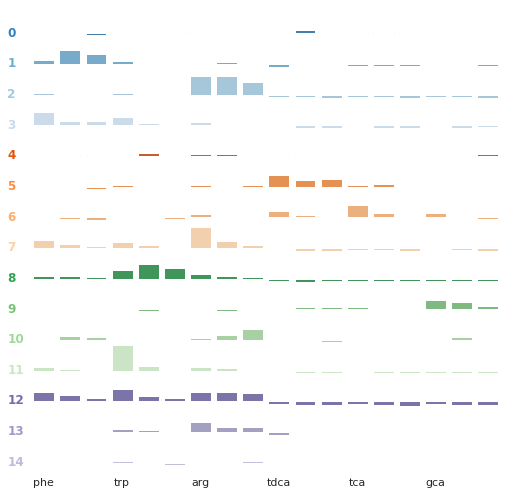

In [237]:
# Initialize the FacetGrid object
pal = sns.color_palette("tab20c") #sns.cubehelix_palette(n_clusters, rot=-.25, light=.7)
g = sns.FacetGrid(cluster_mean_df, row="cluster_id", hue="cluster_id", aspect=15, height=.5, palette=pal)
# Draw the densities in a few steps
g.map(sns.barplot, "trial", 'response')
# passing color=None to refline() uses the hue mapping
#g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-.05, .2, int(float(label)), fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "trial")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.05)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

n_trials = cluster_mean_df.trial.max()
trial_per_odor = 3
trial_list2 = list(cluster_mean_df.trial_key.unique())
for ax in g.axes.flat:
    ax.set_xticks(np.arange(0, n_trials, trial_per_odor)) # <--- set the ticks first
    ax.set_xticklabels(_get_odor_list(trial_list2))
    # ax.set_xlabel('Trial')
    ax.set(xlabel=None)
    


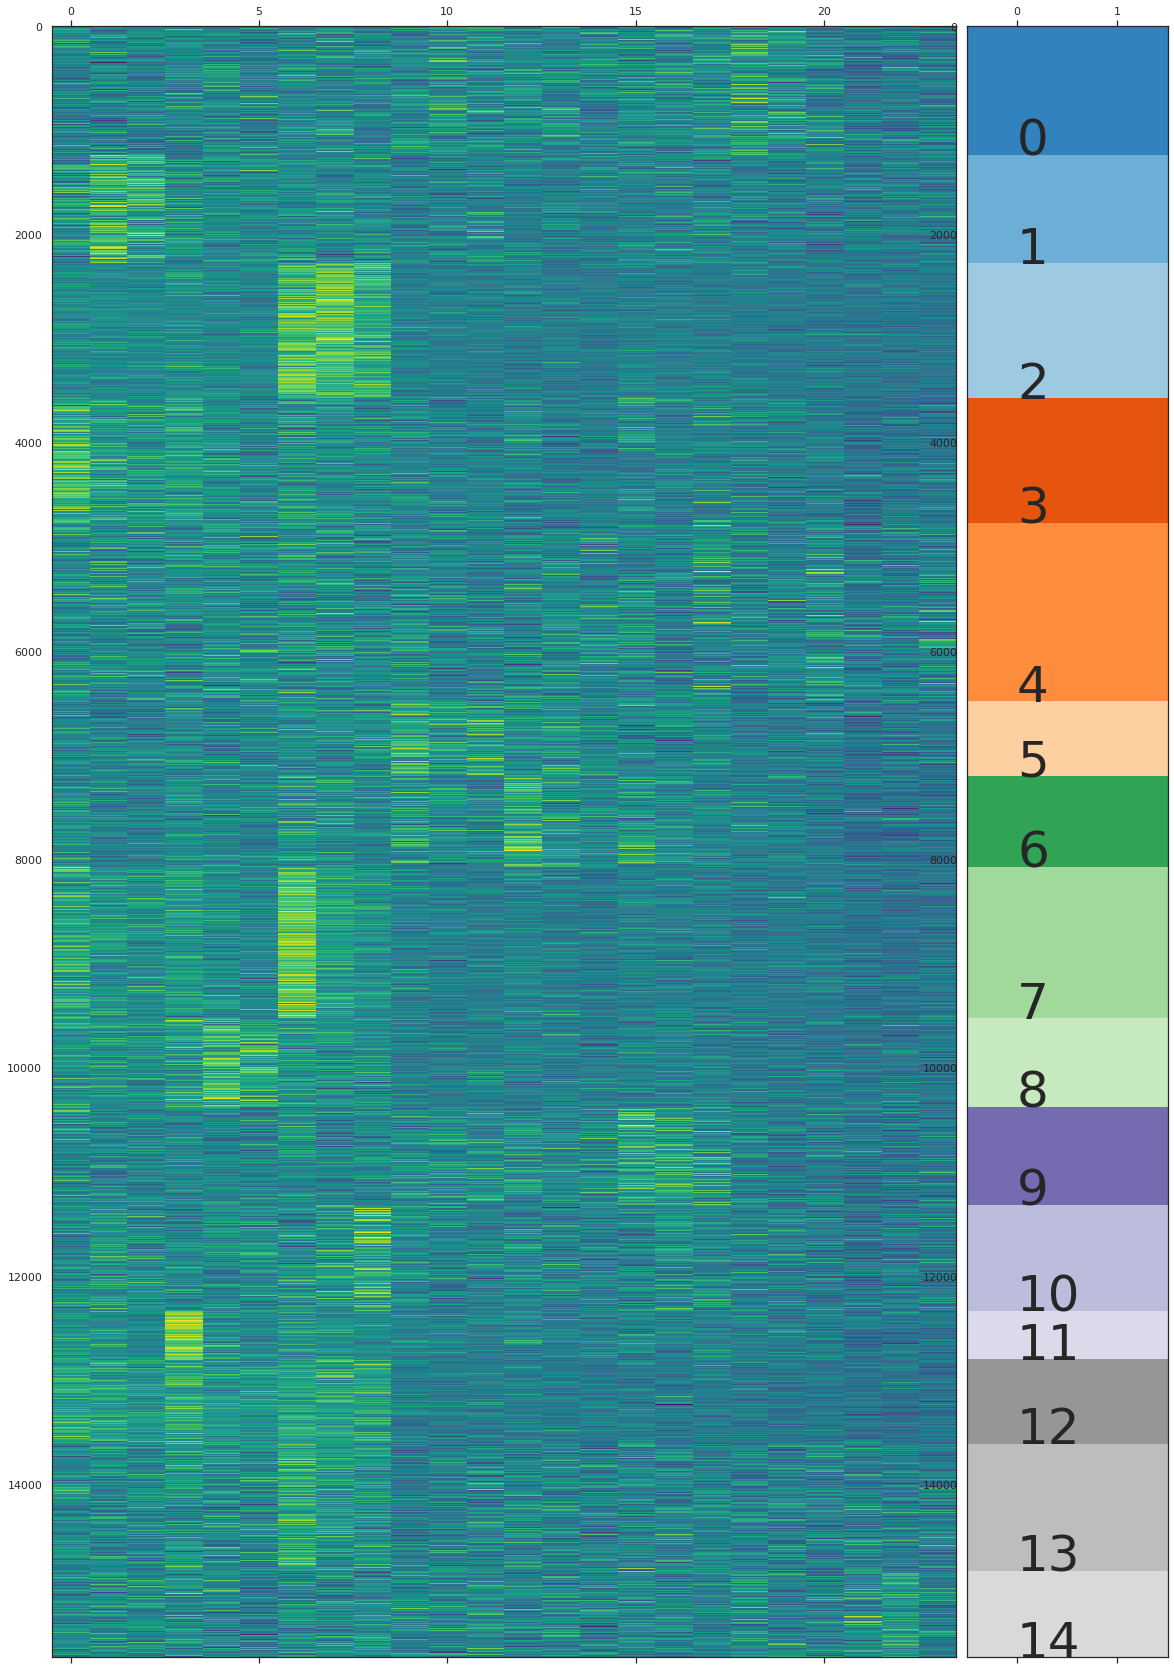

In [241]:
importlib.reload(catclust)
catclust.plot_clustered_heatmap(H, agg_cluster)

In [153]:
cluster_df = pd.DataFrame(agg_cluster.labels_.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
training_dict = dict(dtpar.exp_list)
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df

train_cond  cluster_id
phe-arg     0             0.125397
            1             0.143816
            2             0.090554
            3             0.045096
            4             0.034207
            5             0.032937
            6             0.053625
            7             0.033663
            8             0.034207
            9             0.136195
            10            0.064967
            11            0.115870
            12            0.021504
            13            0.025950
            14            0.042011
arg-phe     0             0.162869
            1             0.054976
            2             0.107600
            3             0.081876
            4             0.042628
            5             0.054094
            6             0.078936
            7             0.057328
            8             0.029105
            9             0.063354
            10            0.025136
            11            0.124651
            12            0.0665

In [186]:
from itertools import combinations
cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

for cluster_id in range(n_clusters):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])

In [242]:
cluster_df = pd.DataFrame(agg_cluster.labels_.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
training_dict = dict(exp_list)
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df


,fish_id,train_cond,cluster_id,ratio
0,2021-02-05-DpOBEM-JH9,phe-arg,0,0.105828
1,2021-02-05-DpOBEM-JH9,phe-arg,1,0.036810
2,2021-02-05-DpOBEM-JH9,phe-arg,2,0.015337
3,2021-02-05-DpOBEM-JH9,phe-arg,3,0.092025
4,2021-02-05-DpOBEM-JH9,phe-arg,4,0.180982
...,...,...,...,...
460,2022-02-20-DpOBEM-N11,naive,10,0.029810
461,2022-02-20-DpOBEM-N11,naive,11,0.008130
462,2022-02-20-DpOBEM-N11,naive,12,0.027100
463,2022-02-20-DpOBEM-N11,naive,13,0.051491


In [243]:
def plot_cluster_cont_with_stat(pairs):
    hue_plot_params = dict(x="cluster_id", y="ratio", hue="train_cond", hue_order=dtpar.cond_list,
                           data=cluster_count_df, palette="Set3")

    with sns.plotting_context("notebook", font_scale = 1.4):
    # Create new plot
        fig, ax = plt.subplots(figsize=(16,10))

    # Plot with seaborn
        ax = sns.boxplot(ax=ax, **hue_plot_params)

    # Add annotations
        annotator = Annotator(ax, pairs, **hue_plot_params)
        annotator.configure(test="t-test_ind").apply_and_annotate()

    # Label and show
        legend = ax.legend()
        frame = legend.get_frame()
        frame.set_facecolor('white')
        ax.set_ylabel('#neurons in cluster/total #neurons')
    return annotator

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5_arg-phe vs. 5_phe-trp: t-test independent samples, P_val:1.053e-01 t=-1.765e+00
6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:5.050e-01 t=-6.892e-01
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:1.669e-01 t=-1.480e+00
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:8.407e-01 t=2.058e-01
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:2.891e-01 t=-1.114e+00
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:4.732e-01 t=7.428e-01
11_arg-phe vs. 11_phe-trp: t-test independent samples, P_val:4.541e-01 t=7.759e-01
12_arg-phe vs. 12_phe-trp: t-test independent samples, P_val:5.715e-01 t=5.832e-01
13_arg-phe vs. 13_phe-trp: t-test independent samples, P_val:6.716e-01 t=4.355e-01
14_arg-phe vs. 14_phe-trp: t-test independent samples, P_val:8.711e-01 t=-1.66

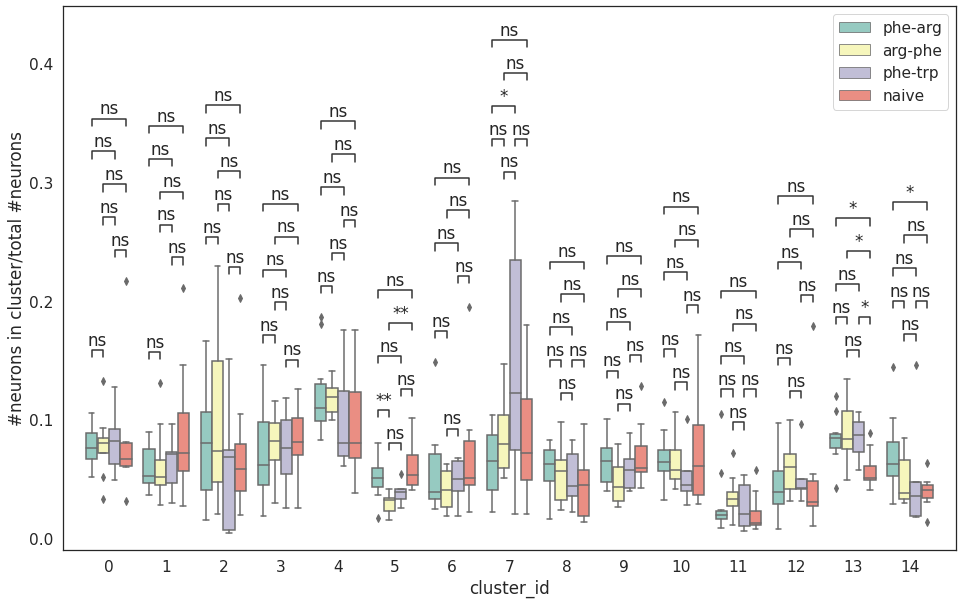

In [244]:
annotator = plot_cluster_cont_with_stat(all_pairs)

In [245]:
def get_significant_pairs(annotator):
    new_pairs = [[ano.data.group1, ano.data.group2] for ano in annotator.annotations if ano.data.pvalue < 0.05]
    return new_pairs

In [246]:
new_pairs = get_significant_pairs(annotator)
new_pairs

[[(5, 'phe-arg'), (5, 'arg-phe')],
 [(13, 'phe-trp'), (13, 'naive')],
 [(5, 'arg-phe'), (5, 'naive')],
 [(7, 'phe-arg'), (7, 'phe-trp')],
 [(13, 'arg-phe'), (13, 'naive')],
 [(13, 'phe-arg'), (13, 'naive')],
 [(14, 'phe-arg'), (14, 'naive')]]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5_phe-arg vs. 5_arg-phe: t-test independent samples, P_val:6.295e-03 t=3.142e+00
13_phe-trp vs. 13_naive: t-test independent samples, P_val:2.334e-02 t=2.632e+00
5_arg-phe vs. 5_naive: t-test independent samples, P_val:1.765e-03 t=-3.851e+00
7_phe-arg vs. 7_phe-trp: t-test independent samples, P_val:3.464e-02 t=-2.359e+00
13_arg-phe vs. 13_naive: t-test independent samples, P_val:1.526e-02 t=2.763e+00
13_phe-arg vs. 13_naive: t-test independent samples, P_val:1.020e-02 t=2.911e+00
14_phe-arg vs. 14_naive: t-test independent samples, P_val:2.187e-02 t=2.539e+00


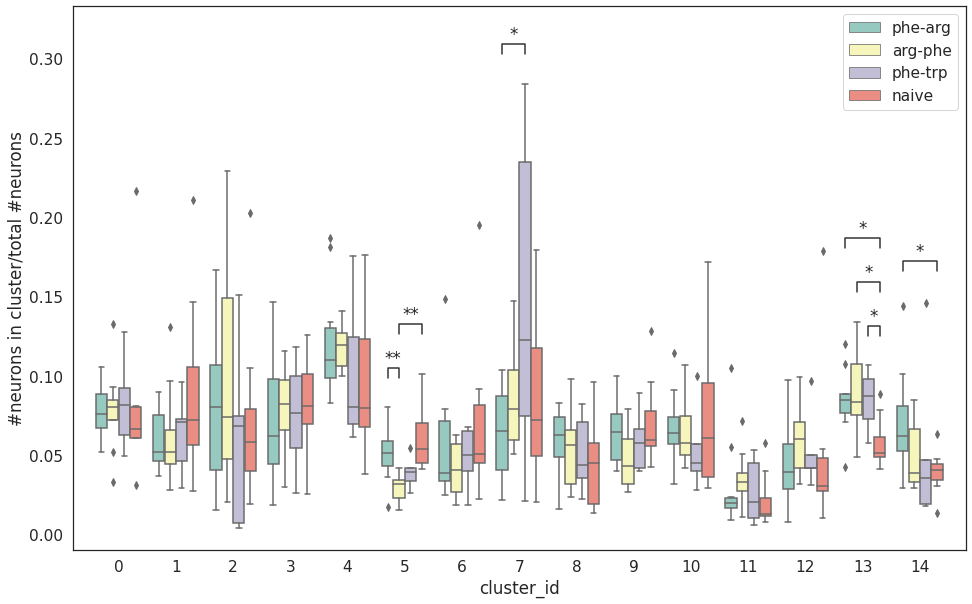

In [247]:
plot_cluster_cont_with_stat(new_pairs)